In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import keras as k
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout, Flatten, BatchNormalization, LocallyConnected1D
import matplotlib.pyplot as plt
import expressyeaself.encode_sequences as encode

%matplotlib inline

Using TensorFlow backend.


In [5]:
data = '/Users/Meenakshi Krishnan/Documents/DIRECT/Capstone/yeastpro/ExpressYeaself/example/processed_data/10000_samples_from_190523000651814570_deflanked_sequences_inserted_into_Abf1TATA_scaffold_padded_with_exp_levels.txt.gz'
en_data = encode.encode_sequences_with_method(data)
print(en_data)

C:\Users\Meenakshi Krishnan\Documents\DIRECT\Capstone\yeastpro\ExpressYeaself\example/encoded_data/20190606220418898176_encoded_sequences.txt


In [6]:
proxy_df = pd.read_csv(en_data, names=['raw_sequence', 'ex_levels'], sep='\t')
proxy_df.head()

,raw_sequence,ex_levels
0,"[[0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0...",1.000000
1,"[[0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0...",10.000000
2,"[[0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0...",8.514205
3,"[[0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0...",3.000000
4,"[[0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0...",7.759058


In [7]:
ex_levels = np.array(proxy_df['ex_levels'])
# ex_levels

In [8]:
# ex_levels = []
# for ex_lev in proxy_df['ex_levels']:
#     array_ex = np.array(ast.literal_eval(ex_lev))
#     ex_levels.append(array_ex)

In [9]:
import ast
#proxy_data = ast.literal_eval(proxy_df[0][0])
seq_mat = []

for sequence in proxy_df['raw_sequence']:
    array_seq = np.array(ast.literal_eval(sequence))
    seq_mat.append(array_seq)
    
seq_mat = np.array(seq_mat)
seq_mat

array([[[0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       ...,

       [[0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]

In [10]:
data_len = seq_mat.shape[0]
data_len

10000

In [11]:
seq_len = seq_mat.shape[1]
seq_len

257

In [19]:
def plot(fit):
    # summarize history for accuracy
    
    plt.subplot(1, 2, 1)
    plt.plot(fit['acc'])
    plt.plot(fit['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(fit['loss'])
    plt.plot(fit['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    #plt.tight_layout()
    
    return plt

In [33]:
def plot_results(fit):
    # Create plot with subplots
    fig, ax = plt.subplots(1, 2, figsize=(12,10))

    # Plot the accuracy plot
    ax1 = plt.subplot(221, xlabel='Epoch', ylabel='Accuracy', title='Model Accuracy Plot')
    ax1.plot(fit['acc'], color='goldenrod', alpha=0.5)
    ax1.plot(fit['val_acc'], color='rebeccapurple', alpha=0.5)

    # Plot the loss plot
    ax2 = plt.subplot(222, xlabel='Epoch', ylabel='Loss', title='Model Loss Plot')
    ax2.plot(fit['loss'], color='goldenrod', alpha=0.5)
    ax2.plot(fit['val_loss'], color='rebeccapurple', alpha=0.5)


    # create a list to store the axes
    axes_list = [ax1, ax2]
    # edit common components using a for loop
    for ax in axes_list:
        ax.title.set_fontsize(12) 
        ax.xaxis.label.set_fontsize(12) 
        ax.yaxis.label.set_fontsize(12)
        ax.legend(['Train', 'Test'], loc='upper left')

    return ax1, ax2

In [34]:
def tt_split(sequence_matrix, expression_levels):
    train_x, test_x, train_y, test_y = train_test_split(sequence_matrix, expression_levels, test_size=0.25)
    return train_x, test_x, train_y, test_y

In [35]:
#tt_split(seq_mat, ex_levels)

In [36]:
def loc_con_1d_model(filters, kernel_size, strides, input_x, input_y, drop_rate, dense_units, optimizer, loss):
    
    # make a global variable
    global model
    
    # initialize model
    model = Sequential()
    model.add(LocallyConnected1D(filters, kernel_size, strides=strides, input_shape=(input_x, input_y), activation='relu'))
    
#     model.add(Dense(50))    
    model.add(Dropout(drop_rate))
    model.add(LocallyConnected1D(50, 15, activation='relu'))
#     model.add(Dense(10))  
#     model.add(Dropout(drop_rate))
#     model.add(Dense(10))  
#     model.add(Dropout(drop_rate))
    model.add(Dense(1)) 
    model.add(Dropout(drop_rate))
    
    model.add(Flatten())
    model.add(Dense(dense_units))
    
    # compile model
    model.compile(optimizer=optimizer, loss=loss, metrics=['mae', 'acc'])
    
    # return model summary
    return(model, model.summary())

In [38]:
loc_con_1d_model(100, 20, 1, 257, 5, 0.5, 1, 'adam', 'mean_squared_error')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
locally_connected1d_6 (Local (None, 238, 100)          2403800   
_________________________________________________________________
dropout_9 (Dropout)          (None, 238, 100)          0         
_________________________________________________________________
locally_connected1d_7 (Local (None, 224, 50)           16811200  
_________________________________________________________________
dense_12 (Dense)             (None, 224, 1)            51        
_________________________________________________________________
dropout_10 (Dropout)         (None, 224, 1)            0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 224)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 225       
Total para

(<keras.engine.sequential.Sequential at 0x192db8c6f98>, None)

In [41]:
def model_eval(sequence_matrix, expression_levels, epochs, batch_size):
    # initialize training and testing values
    train_x, test_x, train_y, test_y = tt_split(sequence_matrix, expression_levels)
    
    # fit model
    fit = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(test_x, test_y))
    
    # evaluate model (run tests)
    scores = model.evaluate(test_x, test_y)
    
    # plot results
    plt = plot_results(fit.history)
    #plt.show()
    
    # return model accuracy
    return("Values: "+ str(model.metrics_names[0]) + ': ' + str(scores[0]) + ' ' + str(model.metrics_names[2]) + ': ' + str(scores[2]*100) + '%')

Train on 7500 samples, validate on 2500 samples
Epoch 1/1
2500/2500 [==============================] - 4s 2ms/step


'Values: loss: 6.0154744819641115 acc: 12.36%'

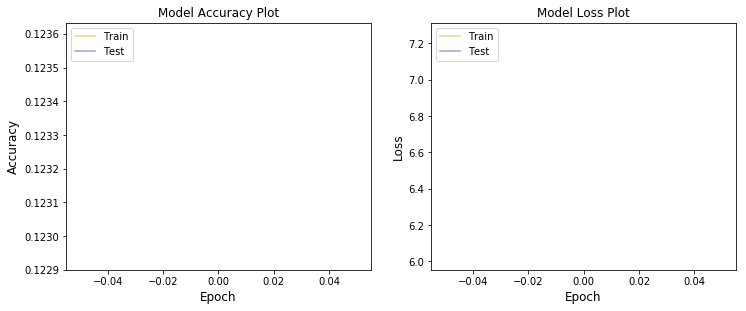

In [42]:
model_eval(seq_mat, ex_levels, 1, 100)